# B"H

---



## ECDF - Empirical Cumulative Distribution Function

- This ***cumulative distribution function*** jumps up by **1/n** at each of the **n** data points. 

- Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.

- It is ***empirical*** in that it is associated with the ***empirical measurements*** of a sample. 

---

- It is a step function used to show the distribution of data. 
- It can answer what percentage of the data is under a specific value.

---

#### Why use ecdfs over histograms?
- Histogram can show the distribution of your data also. However you can be tricked by histograms depending on the number of bins you used.
- ECDF's are immune to binning bias.

---

In [1]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
C:\Users\Inez\repos\coding-deep-dive\env-python-learn
------------------------------
 
------------------------------
           src_dir            
C:\Users\Inez\repos\coding-deep-dive\env-python-learn\src
------------------------------
 


---
### Get the `iris` dataset

In [4]:

col_names = [
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)',
    'species'
]    

In [5]:
iris_df = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'iris-data.csv',
    p_header       = None,
    p_names        = col_names
)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


---
### Pull the species' petal length into arrays

In [6]:
iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
setosa_petal_length     = iris_df[iris_df['species'] == 'Iris-setosa']['petal length (cm)'].values

versicolor_petal_length = iris_df[iris_df['species'] == 'Iris-versicolor']['petal length (cm)'].values

virginica_petal_length  = iris_df[iris_df['species'] == 'Iris-virginica']['petal length (cm)'].values

---
### Plot ECDF

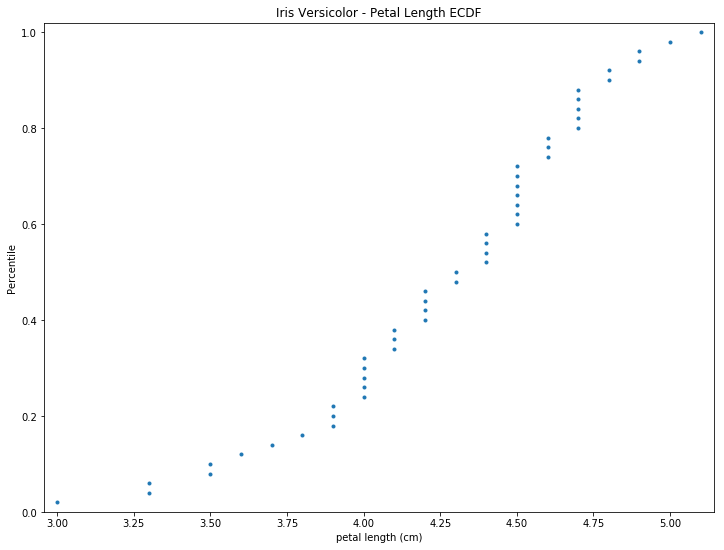

In [8]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = hf.ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('Percentile')

_ = plt.title('Iris Versicolor - Petal Length ECDF')

# Display the plot
plt.show()

---
### Comparison of ECDFs using multiple ECDFs on one plot

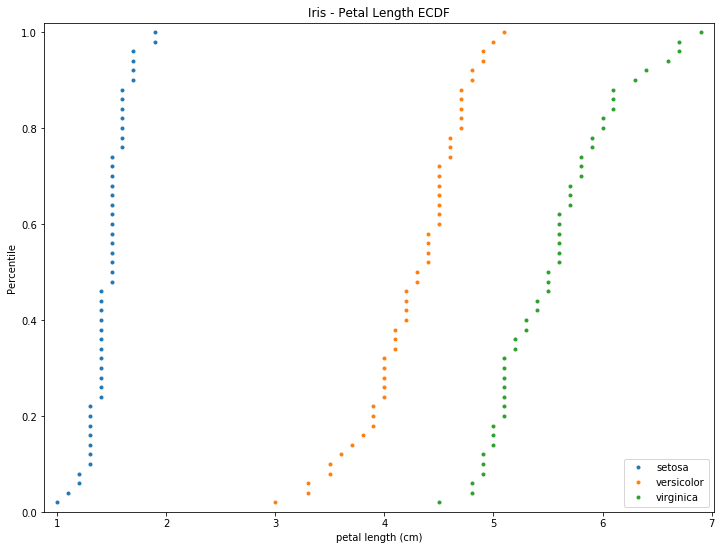

In [9]:
# Compute ECDFs
x_set, y_set   = hf.ecdf(setosa_petal_length)
x_vers, y_vers = hf.ecdf(versicolor_petal_length)
x_virg, y_virg = hf.ecdf(virginica_petal_length)


# Plot all ECDFs on the same plot
_ = plt.plot(x_set,  y_set,  marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Make nice margins
plt.margins(0.02)


# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('Percentile')

_ = plt.title('Iris - Petal Length ECDF')

# Display the plot
plt.show()

The ECDFs expose clear differences among the species. 
- Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

---

### Overlay **mean** and **percentiles** on top of ECDF

---
#### Compute the mean

In [10]:
mean_length_vers = np.mean(versicolor_petal_length)

print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


--- 
#### Compute percentiles

In [11]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])


ptiles_vers = np.percentile(
    versicolor_petal_length, 
    percentiles
)

ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

---
#### Overlay on top of ECDF

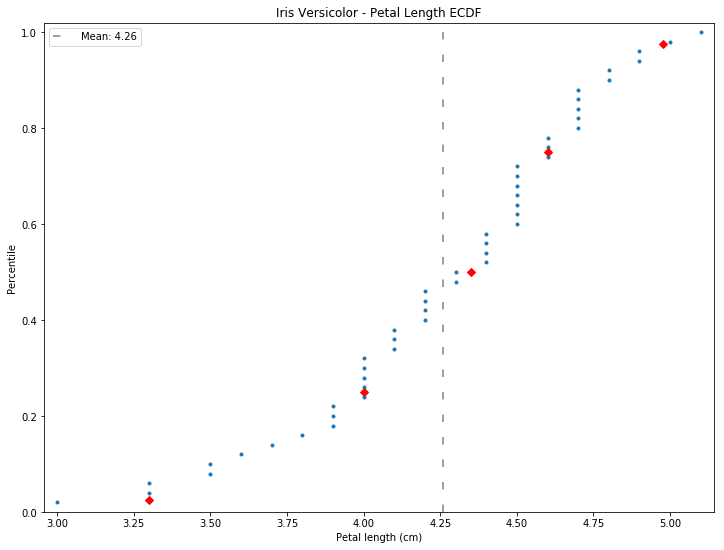

In [12]:
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Plot the ECDF
_ = plt.plot(
    x_vers, 
    y_vers, 
    '.')

plt.margins(0.02)

_ = plt.xlabel('Petal length (cm)')
_ = plt.ylabel('Percentile')
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Overlay percentiles as red x's
#
# Note that to ensure the Y-axis of the plot remains between 0 and 1, you will 
# need to rescale the percentiles array accordingly - in this case, dividing it by 100.

_ = plt.plot(
    ptiles_vers, 
    percentiles/100,  
    marker    = 'D', 
    color     = 'red',
    linestyle = 'none'
)
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Make vertical line for the mean
#
_ = plt.axvline(
    x      = mean_length_vers,
    color  = 'grey',
    label  = 'Mean: '+str(mean_length_vers),
    dashes = [5, 10]  # 5 points on, 10 off
)
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



_ = plt.legend(loc='upper left')
_ = plt.title('Iris Versicolor - Petal Length ECDF')


plt.show()


---

## PDF - Probability Density Function


- While the absolute likelihood for a ***continuous random variable*** to take on any ***particular value*** is ***0*** (since there are an infinite set of possible values to begin with), the PDF is used to specify the probability of the random variable falling within a ***particular range*** of values, as opposed to taking on any one value. 

- This probability is given by the ***integral*** of this variable's PDF ***over that range***. 
- The probability density function is ***nonnegative everywhere***, and its ***integral over the entire space is equal to one***.

<img src="images/normal-pdf.png">

---
### The Normal PDF


In [13]:
# Draw 100000 samples from Normal distribution with stds of interest: 
samples_std1  = np.random.normal(
    loc   = 20,     # Mean (“centre”) of the distribution.
    scale = 1,      # Standard deviation (spread or “width”) of the distribution. 
    size  = 100000  
)

samples_std3  = np.random.normal(20, 3,  size=100000)

samples_std10 = np.random.normal(20, 10, size=100000)

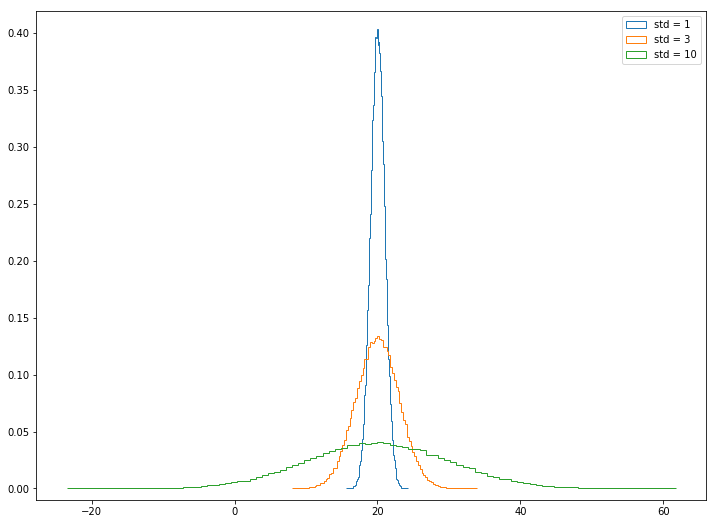

In [14]:


# Make histograms
_ = plt.hist(samples_std1,  bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3,  bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


Note how the peaks are all centered at the ***mean*** of 20.

---
## The Normal CDF

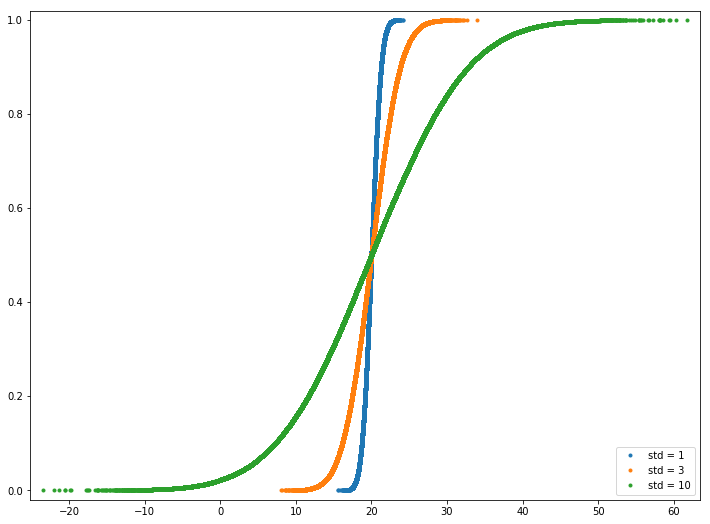

In [15]:
# Generate CDFs
x_std1, y_std1   = hf.ecdf(samples_std1)
x_std3, y_std3   = hf.ecdf(samples_std3)
x_std10, y_std10 = hf.ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1,  y_std1,  marker='.', linestyle='none')
_ = plt.plot(x_std3,  y_std3,  marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


- Note how the CDFs all pass through the mean at the 50th percentile; the **mean and median of a Normal distribution are equal**. 
- The width of the CDF varies with the standard deviation.


---

## Checking if a dataset is ***normally distributed***

---
### Are the Belmont Stakes results Normally distributed?
- Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. 
- Secretariat ran the fastest Belmont Stakes in history in 1973. 
- While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. 
- **With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times.** 
- Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. 
- Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [16]:
belmont_no_outliers = np.array([
    148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
    149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
    151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
    146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
    147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
    149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
    149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
    150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
    148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
    149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
    149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
    152.2 
])

In [17]:
# Compute mean and standard deviation: 
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

print(mu, sigma)

149.22101123595507 1.6186456017743405


In [18]:
# Sample out of a normal distribution with this mu and sigma: 
samples = np.random.normal(mu, sigma, size=10000)

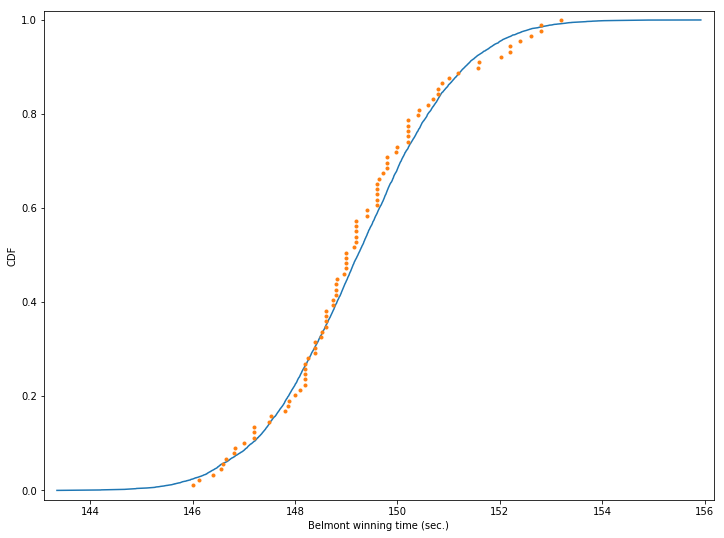

In [19]:
# Get the CDF of the samples and of the data
x_theor, y_theor = hf.ecdf(samples)
x, y             = hf.ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')

plt.show()


- The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. 
-  This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

---
### What are the chances of a horse matching or beating Secretariat's record?
- Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed)
- What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of **144 seconds**.

In [20]:
# Compute mean and standard deviation: 
mu    = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Take a million samples out of the Normal distribution: 
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: 
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.00067


- We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. 
- We get that **there is only a 0.06% chance** of a horse running the Belmont as fast as Secretariat.